# MadMiner particle physics tutorial

# Part 4b: The Fisher information

Johann Brehmer, Felix Kling, Irina Espejo, and Kyle Cranmer 2018-2019

## 0. Preparations

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import six
import logging
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from madminer.fisherinformation import FisherInformation
from madminer.plotting import plot_fisher_information_contours_2d


In [2]:
# MadMiner output
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

## 1. Calculating the Fisher information

We can use SALLY estimators (see part 3b of this tutorial) not just to define optimal observables, but also to calculate the (expected) Fisher information in a process. In `madminer.fisherinformation` we provide the `FisherInformation` class that makes this more convenient.

In [8]:
#fisher = FisherInformation('data/lhe_data_shuffled.h5')
fisher = FisherInformation('data/delphes_data_shuffled.h5')

15:52 madminer.analysis    INFO    Loading data from data/delphes_data_shuffled.h5
15:52 madminer.analysis    INFO    Found 2 parameters
15:52 madminer.analysis    INFO    Did not find nuisance parameters
15:52 madminer.analysis    INFO    Found 6 benchmarks, of which 6 physical
15:52 madminer.analysis    INFO    Found 3 observables
15:52 madminer.analysis    INFO    Found 39902 events
15:52 madminer.analysis    INFO      21365 signal events sampled from benchmark sm
15:52 madminer.analysis    INFO      18537 signal events sampled from benchmark w
15:52 madminer.analysis    INFO    Found morphing setup with 6 components
15:52 madminer.analysis    INFO    Did not find nuisance morphing setup


This class provides different functions:
- `rate_information()` calculates the Fisher information in total rates,
- `histo_information()` calculates the Fisher information in 1D histograms,
- `histo_information_2d()` calculates the Fisher information in 2D histograms,
- `full_information()` calculates the full detector-level Fisher information using a SALLY estimator, and
- `truth_information()` calculates the truth-level Fisher information.

Here we use the SALLY approach:

In [9]:
fisher_information, _ = fisher.full_information(
    theta=[0.,0.],
    model_file='models/sally',
    luminosity=30000.,
)

print('Fisher information after 30 ifb:\n{}'.format(fisher_information))

15:52 madminer.ml          INFO    Loading model from models/sally
15:52 madminer.fisherinfor INFO    Found 2 parameters in SALLY model, matching 2 physical parameters in MadMiner file
15:52 madminer.fisherinfor INFO    Evaluating rate Fisher information
15:52 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 1
15:52 madminer.ml          INFO    Loading evaluation data
15:52 madminer.ml          INFO    Calculating Fisher information


Fisher information after 30 ifb:
[[7.81933905 0.32675492]
 [0.32675492 4.3508183 ]]


For comparison, we can calculate the Fisher information in the histogram of observables:

In [10]:
info_histo_1d, cov_histo_1d = fisher.histo_information(
    theta=[0.,0.],
    luminosity=30000.,
    observable="pt_j1",
    bins=[30.,100.,200.,400.],
    histrange=[30.,400.],
)

print('Histogram Fisher information after 30 ifb:\n{}'.format(info_histo_1d))

15:52 madminer.fisherinfor INFO    Bins with largest statistical uncertainties on rates:
15:52 madminer.fisherinfor INFO      Bin 1: (0.00493 +/- 0.00126) fb (25 %)
15:52 madminer.fisherinfor INFO      Bin 2: (0.28230 +/- 0.01859) fb (7 %)
15:52 madminer.fisherinfor INFO      Bin 5: (0.00244 +/- 0.00014) fb (6 %)
15:52 madminer.fisherinfor INFO      Bin 4: (0.03701 +/- 0.00162) fb (4 %)
15:52 madminer.fisherinfor INFO      Bin 3: (0.15474 +/- 0.00392) fb (3 %)


Histogram Fisher information after 30 ifb:
[[5.4963181  0.21823753]
 [0.21823753 0.03809172]]


We can do the same thing in 2D:

In [11]:
info_histo_2d, cov_histo_2d = fisher.histo_information_2d(
    theta=[0.,0.],
    luminosity=30000.,
    observable1="pt_j1",
    bins1=[30.,100.,200.,400.],
    histrange1=[30.,400.],
    observable2="delta_phi_jj",
    bins2=5,
    histrange2=[0.,6.2],
)

print('Histogram Fisher information after 30 ifb:\n{}'.format(info_histo_2d))

15:52 madminer.fisherinfor INFO    Bins with largest statistical uncertainties on rates:
15:52 madminer.fisherinfor INFO      Bin (1, 3): (0.00187 +/- 0.00101) fb (54 %)
15:52 madminer.fisherinfor INFO      Bin (1, 1): (0.00219 +/- 0.00074) fb (34 %)
15:52 madminer.fisherinfor INFO      Bin (2, 3): (0.06935 +/- 0.01631) fb (24 %)
15:52 madminer.fisherinfor INFO      Bin (4, 4): (0.00693 +/- 0.00146) fb (21 %)
15:52 madminer.fisherinfor INFO      Bin (1, 4): (0.00029 +/- 0.00006) fb (20 %)


Histogram Fisher information after 30 ifb:
[[6.07483039 0.22238568]
 [0.22238568 3.66862165]]


## 2. Plot Fisher distances

We also provide a convenience function to plot contours of constant Fisher distance `d^2(theta, theta_ref) = I_ij(theta_ref) * (theta-theta_ref)_i * (theta-theta_ref)_j`:

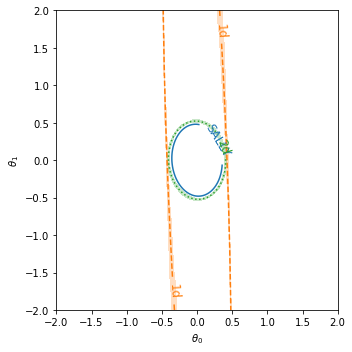

In [12]:
_ = plot_fisher_information_contours_2d(
    [fisher_information, info_histo_1d, info_histo_2d],
    [None, cov_histo_1d, cov_histo_2d],
    inline_labels=["SALLY", "1d", "2d"],
    xrange=(-2,2),
    yrange=(-2,2)
)